In [2]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd

In [206]:
file_path = '/Users/timrudge/cellmodeller/data/param_scan_psi_hd_10x/'

# Location of the data we want to analyse, assume all folders are results
folders = os.listdir(file_path)

df_hd = pd.DataFrame(columns=['Wc', 'psi', 'density', 'time', 'max_size', 'mean_size', 'number'])
df_hd_dist = pd.DataFrame(columns=['Wc', 'psi', 'density', 'time', 'size'])


for folder in folders:
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    
    # Extract parameters from folder name
    parts = fname.split('__')
    Wc = float(parts[1].replace('_', '.'))
    psi = float(parts[3].replace('_', '.'))
    N = int(parts[6].split('_')[0])
    sphere_rad = float(parts[6].split('_')[3].split('-')[0])
    density = N / (4 * sphere_rad**2)
    
    # Look at the first 1000 time steps of this simulation
    for t in range(0,1000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            # Dominant cluster size
            max_size = np.max(sizes)
            mean_size = np.mean(sizes)
            # Count the number of clusters, including single cells
            number = nx.number_connected_components(G) + N - np.sum(sizes)
            row = {
                'Wc': Wc, 
                'psi':psi, 
                'time':t, 
                'density':density,
                'max_size':max_size, 
                'mean_size':mean_size, 
                'number':number,
            }
            df_hd = df_hd.append(row, ignore_index=True)
            rows = pd.DataFrame()
            rows['size'] = sizes
            rows['Wc'], rows['psi'], rows['time'], rows['density'] = Wc, psi, t, density
            df_hd_dist = df_hd_dist.append(rows)

In [326]:
file_path = '/Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/'

# Location of the data we want to analyse, assume all folders are results
folders = os.listdir(file_path)

df_md = pd.DataFrame(columns=['Wc', 'psi', 'density', 'time', 'max_size', 'mean_size', 'number'])
df_md_dist = pd.DataFrame(columns=['Wc', 'psi', 'density', 'time', 'size'])


for folder in folders:
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    print('Processing file: ', fname)
    # Extract parameters from folder name
    parts = fname.split('__')
    Wc = float(parts[1].replace('_', '.'))
    psi = float(parts[3].replace('_', '.'))
    N = int(parts[6].split('_')[0])
    sphere_rad = float(parts[6].split('_')[3].split('-')[0])
    density = N/ (4 * sphere_rad**2)
    
    # Look at the first 1000 time steps of this simulation
    for t in range(0,4000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            # Dominant cluster size
            max_size = np.max(sizes)
            mean_size = np.mean(sizes)
            # Count the number of clusters, including single cells
            number = nx.number_connected_components(G) + N - np.sum(sizes)
            row = {
                'Wc': Wc, 
                'psi':psi, 
                'time':t, 
                'density':density,
                'max_size':max_size, 
                'mean_size':mean_size, 
                'number':number,
            }
            df_md = df_md.append(row, ignore_index=True)
            rows = pd.DataFrame()
            rows['size'] = sizes
            rows['Wc'], rows['psi'], rows['time'], rows['density'] = Wc, psi, t, density
            df_md_dist = df_md_dist.append(rows)

Processing file:  /Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__0__ftax__0__3000_cells_sphere_40-20-08-01-17-46/step-%05d.pickle
Processing file:  /Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__0__ftax__0__3000_cells_sphere_40-20-08-01-18-01/step-%05d.pickle
Processing file:  /Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__1__ftax__0__3000_cells_sphere_40-20-08-02-00-20/step-%05d.pickle
Processing file:  /Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__1__ftax__0__3000_cells_sphere_40-20-08-01-21-03/step-%05d.pickle
Processing file:  /Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__1__ftax__0__3000_cells_sphere_40-20-08-01-21-32/step-%05d.pickle
Processing file:  /Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__0__ftax__0__3000_cells_sphere_40-20-08-01-19-06/step-%05d.pickle
Processing file:  /Users/tim

FileNotFoundError: [Errno 2] No such file or directory: '/Users/timrudge/cellmodeller/data/param_scan_psi_md_10x_10000steps/Wc__1__psi__0__ftax__0__3000_cells_sphere_40-20-08-01-19-52/step-03880.pickle'

In [316]:
file_path = '/Users/timrudge/cellmodeller/data/param_scan_psi_ld_10x_10000steps'

# Location of the data we want to analyse, assume all folders are results
folders = os.listdir(file_path)

df_ld = pd.DataFrame(columns=['Wc', 'psi', 'density', 'time', 'max_size', 'mean_size', 'number'])
df_ld_dist = pd.DataFrame(columns=['Wc', 'psi', 'density', 'time', 'size'])


for folder in folders:
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    
    # Extract parameters from folder name
    parts = fname.split('__')
    Wc = float(parts[1].replace('_', '.'))
    psi = float(parts[3].replace('_', '.'))
    N = int(parts[6].split('_')[0])
    sphere_rad = float(parts[6].split('_')[3].split('-')[0])
    density = N / (4 * sphere_rad**2)
    
    # Look at the first 1000 time steps of this simulation
    for t in range(0,10000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            # Dominant cluster size
            max_size = np.max(sizes)
            mean_size = np.mean(sizes)
            # Count the number of clusters, including single cells
            number = nx.number_connected_components(G) + N - np.sum(sizes)
            row = {
                'Wc': Wc, 
                'psi':psi, 
                'time':t, 
                'density':density,
                'max_size':max_size, 
                'mean_size':mean_size, 
                'number':number,
            }
            df_ld = df_ld.append(row, ignore_index=True)
            rows = pd.DataFrame()
            rows['size'] = sizes
            rows['Wc'], rows['psi'], rows['time'], rows['density'] = Wc, psi, t, density
            df_ld_dist = df_ld_dist.append(rows)

In [317]:
df_ld.head()

,Wc,psi,density,time,max_size,mean_size,number
0,1.0,1.0,0.15625,0.0,12.0,2.708791,689.0
1,1.0,1.0,0.15625,10.0,19.0,3.409091,417.0
2,1.0,1.0,0.15625,20.0,23.0,3.768595,330.0
3,1.0,1.0,0.15625,30.0,24.0,4.042735,288.0
4,1.0,1.0,0.15625,40.0,26.0,4.390909,254.0


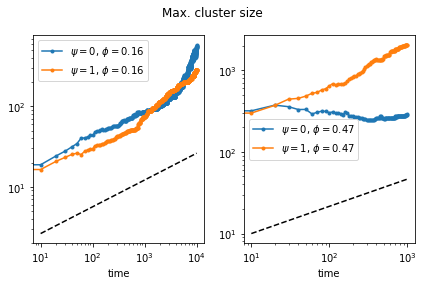

In [322]:
fig,axs = plt.subplots(1,2)

legend = []
for psi,gg in df_ld.groupby('psi'):
    mean = gg.sort_values('time').groupby('time').mean()
    #mean = mean / mean.max()
    mean.plot(y='max_size', ax=axs[0], loglog=True, style='.-')
    legend.append(r'$\psi=%0.2g$, $\phi=%0.2g$'%(psi,0.16))
axs[0].legend(legend)
log_min = np.log10(mean['mean_size'].min())
axs[0].plot([1e1,1e4], [10**log_min, 10**(log_min+3/3)], 'k--')

legend = []
for psi,gg in df_md.groupby('psi'):
    mean = gg.sort_values('time').groupby('time').mean()
    #mean = mean / mean.max()
    mean.plot(y='max_size', ax=axs[1], loglog=True, style='.-')
    legend.append(r'$\psi=%0.2g$, $\phi=%0.2g$'%(psi,0.47))
axs[1].legend(legend)
log_min = np.log10(mean['mean_size'].min())
axs[1].plot([1e1,1e3], [10**1, 10**(1+2/3)], 'k--')

plt.suptitle('Max. cluster size')
plt.tight_layout()

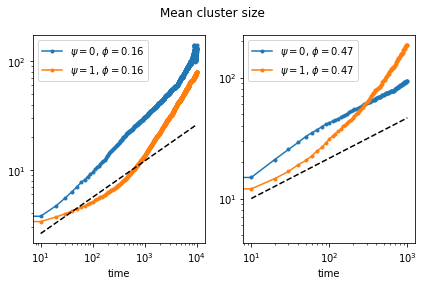

In [320]:
fig,axs = plt.subplots(1,2)

legend = []
for psi,gg in df_ld.groupby('psi'):
    mean = gg.sort_values('time').groupby('time').mean()
    #mean = mean / mean.max()
    mean.plot(y='mean_size', ax=axs[0], loglog=True, style='.-')
    legend.append(r'$\psi=%0.2g$, $\phi=%0.2g$'%(psi,0.16))
axs[0].legend(legend)
log_min = np.log10(mean['mean_size'].min())
axs[0].plot([1e1,1e4], [10**log_min, 10**(log_min+3/3)], 'k--')

legend = []
for psi,gg in df_md.groupby('psi'):
    mean = gg.sort_values('time').groupby('time').mean()
    #mean = mean / mean.max()
    mean.plot(y='mean_size', ax=axs[1], loglog=True, style='.-')
    legend.append(r'$\psi=%0.2g$, $\phi=%0.2g$'%(psi,0.47))
axs[1].legend(legend)
log_min = np.log10(mean['mean_size'].min())
axs[1].plot([1e1,1e3], [10**1, 10**(1+2/3)], 'k--')

plt.suptitle('Mean cluster size')
plt.tight_layout()

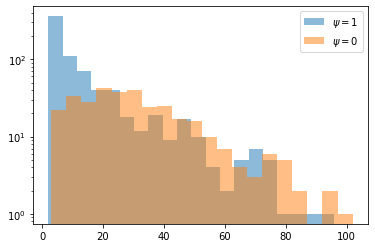

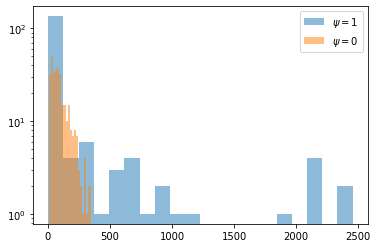

In [311]:
gg = df_ld_dist[(df_ld_dist.time==990) * (df_ld_dist.Wc==1) * (df_ld_dist.psi==1)]
plt.hist(gg['size'], bins=20, log=True, alpha=0.5)
gg = df_ld_dist[(df_ld_dist.time==990) * (df_ld_dist.Wc==1) * (df_ld_dist.psi==0)]
plt.hist(gg['size'], bins=20, log=True, alpha=0.5)
plt.legend(['$\psi=1$', '$\psi=0$'])

plt.figure()
gg = df_md_dist[(df_md_dist.time==990) * (df_md_dist.Wc==1) * (df_md_dist.psi==1)]
plt.hist(gg['size'], bins=20, log=True, alpha=0.5)
gg = df_md_dist[(df_md_dist.time==990) * (df_md_dist.Wc==1) * (df_md_dist.psi==0)]
plt.hist(gg['size'], bins=20, log=True, alpha=0.5)
plt.legend(['$\psi=1$', '$\psi=0$'])

<ipython-input-190-7a98dc4514a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='number', style='-')
<ipython-input-190-7a98dc4514a1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='max_size', style='-')
<ipython-input-190-7a98dc4514a1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='mean_size', style='-')


<AxesSubplot:xlabel='Wc'>

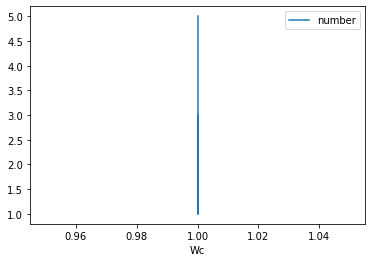

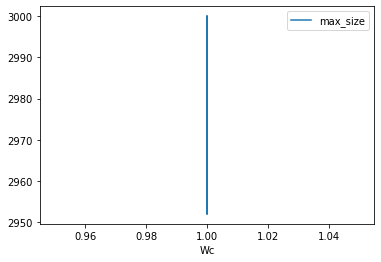

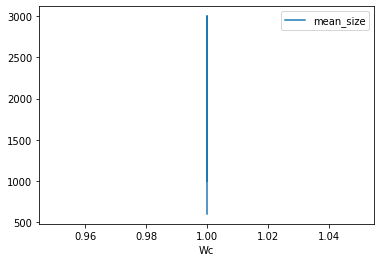

In [190]:
df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='number', style='-')
df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='max_size', style='-')
df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='mean_size', style='-')

In [131]:
dfend = df[df.time==990]
c1,bins1 = pd.cut(dfend.Wc, bins=10, retbins=True)
c2,bins2 = pd.cut(dfend.psi, bins=10, retbins=True) 
hm_number = dfend.groupby([c1, c2]).number.mean().unstack()
hm_max_size = dfend.groupby([c1, c2]).max_size.mean().unstack()
hm_mean_size = dfend.groupby([c1, c2]).mean_size.mean().unstack()

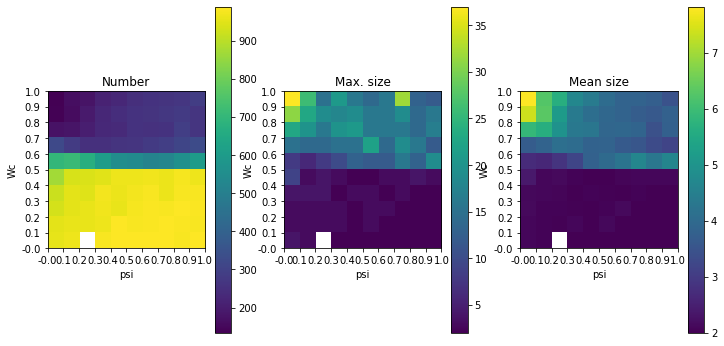

In [132]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(hm_number, origin='lower')
plt.title('Number')
plt.xlabel('psi')
plt.ylabel('Wc')
plt.xticks(np.arange(11)-0.5, np.round(bins2, decimals=2))
plt.yticks(np.arange(11)-0.5, np.round(bins1, decimals=2))
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(hm_max_size, origin='lower')
plt.title('Max. size')
plt.xlabel('psi')
plt.ylabel('Wc')
plt.xticks(np.arange(11)-0.5, np.round(bins2, decimals=2))
plt.yticks(np.arange(11)-0.5, np.round(bins1, decimals=2))
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(hm_mean_size, origin='lower')
plt.title('Mean size')
plt.xlabel('psi')
plt.ylabel('Wc')
plt.xticks(np.arange(11)-0.5, np.round(bins2, decimals=2))
plt.yticks(np.arange(11)-0.5, np.round(bins1, decimals=2))
plt.colorbar()

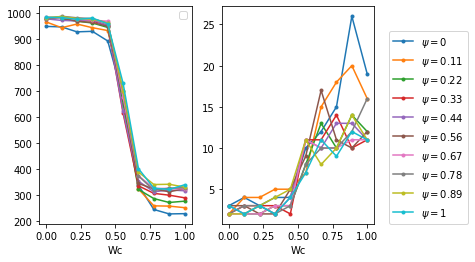

In [133]:
fig,axs = plt.subplots(1,2)
dfend = df[df.time==390]
grouped = dfend.groupby('psi')
for psi,g in grouped:
    g.sort_values('Wc').plot(x='Wc', y='number', ax=axs[0], style='.-')
    g.sort_values('Wc').plot(x='Wc', y='max_size', ax=axs[1], style='.-')
legend = ['$\psi=%0.2g$'%psi for psi,g in grouped]
axs[0].legend([])
axs[1].legend(legend, loc=(1.1,0))

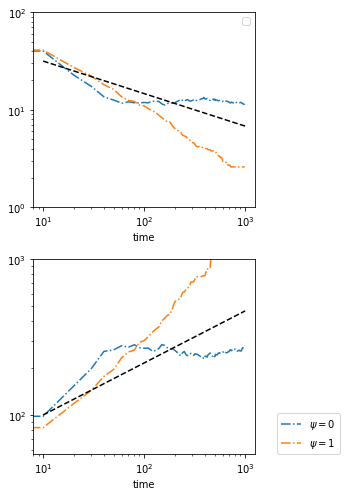

In [205]:
fig,axs = plt.subplots(2,1, figsize=(5,7))
df_Wc1 = df[df.Wc==1]
grouped = df_Wc1.groupby('psi')
for psi,g in grouped:
    mean = g.sort_values('time').groupby('time').mean()
    mean.plot(y='number', ax=axs[0], loglog=True, style='-.')
    mean.plot(y='mean_size', ax=axs[1], loglog=True, style='-.')
legend = ['$\psi=%0.2g$'%psi for psi,g in grouped]
axs[0].legend([])
axs[1].legend(legend, loc=(1.1,0))
axs[0].plot([1e1,1e3], [10**1.5, 10**(1.5-2/3)], 'k--')
axs[0].set_ylim([1e0,1e2])
axs[1].plot([1e1,1e3], [1e2, 10**(2+2/3)], 'k--')
axs[1].set_ylim([10**1.75,1e3])
plt.tight_layout()

<ipython-input-89-6c6b312f1bd4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df.Wc==1][df.psi==1]
<ipython-input-89-6c6b312f1bd4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[df.Wc==1][df.psi==0]
<ipython-input-89-6c6b312f1bd4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df[df.Wc==0.555556][df.psi==1]
<ipython-input-89-6c6b312f1bd4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df[df.Wc==0.555556][df.psi==0]


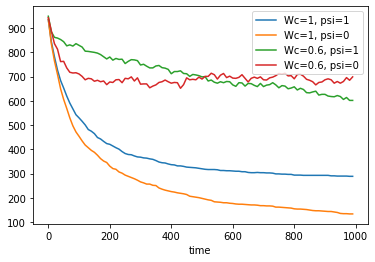

In [89]:
df1 = df[df.Wc==1][df.psi==1]
df2 = df[df.Wc==1][df.psi==0]
df3 = df[df.Wc==0.555556][df.psi==1]
df4 = df[df.Wc==0.555556][df.psi==0]

fig,axs = plt.subplots(1,1)
loglog = False
df1.plot(x='time', y='number', ax=axs, loglog=loglog)
df2.plot(x='time', y='number', ax=axs, loglog=loglog)
df3.plot(x='time', y='number', ax=axs, loglog=loglog)
df4.plot(x='time', y='number', ax=axs, loglog=loglog)
axs.legend(['Wc=1, psi=1', 'Wc=1, psi=0', 'Wc=0.6, psi=1', 'Wc=0.6, psi=0'])

(array([152.,   5.,   5.,   3.,   4.,   1.,   3.,   1.,   0.,   0.,   0.,
          0.,   1.,   1.,   3.,   1.,   1.,   0.,   0.,  10.]),
 array([2.0000e+00, 1.5190e+02, 3.0180e+02, 4.5170e+02, 6.0160e+02,
        7.5150e+02, 9.0140e+02, 1.0513e+03, 1.2012e+03, 1.3511e+03,
        1.5010e+03, 1.6509e+03, 1.8008e+03, 1.9507e+03, 2.1006e+03,
        2.2505e+03, 2.4004e+03, 2.5503e+03, 2.7002e+03, 2.8501e+03,
        3.0000e+03]),
 <BarContainer object of 20 artists>)

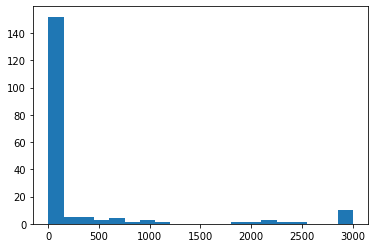

In [238]:
fig,ax = plt.subplots(1,1)
#for wc, g in df_dist.groupby('Wc'):
#    for psi,gg in g.groupby('psi'):
df_dist_combo = df_hd_dist.append(df_md_dist)
gg = df_dist_combo[(df_dist_combo.time==990) * (df_dist_combo.Wc==1) * (df_dist_combo.psi==1)]
plt.hist(gg['size'], bins=20)

In [143]:
type(df_dist['size'])
print(rad)

100.0


In [178]:
file_path = '/Users/timrudge/cellmodeller/data'

# Location of the data we want to analyse, assume all folders are results
folders = [
    #'SPPTest_sphere-20-07-30-13-57',
    'SPPTest_sphere-20-07-30-14-28',
    'SPPTest_sphere-20-07-30-17-47',
    'SPPTest_sphere-20-07-30-18-10'
]

df_hd = pd.DataFrame(columns=['Wc', 'psi', 'time', 'rad', 'max_size', 'mean_size', 'number'])
df_hd_dist = pd.DataFrame(columns=['Wc', 'psi', 'time', 'rad', 'size'])
N=3000

for folder,rad,psi in zip(folders, [30,30,30], [0,0,1]):
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    
    # Look at the first 1000 time steps of this simulation
    for t in range(0,1000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            # Dominant cluster size
            max_size = np.max(sizes)
            mean_size = np.mean(sizes)
            # Count the number of clusters, including single cells
            number = nx.number_connected_components(G) + N - np.sum(sizes)
            row = {
                'Wc': 1, 
                'psi':psi, 
                'time':t, 
                'rad': rad,
                'max_size':max_size, 
                'mean_size':mean_size, 
                'number':number,
            }
            df_hd = df_hd.append(row, ignore_index=True)
            rows = pd.DataFrame()
            rows['size'] = sizes
            rows['Wc'], rows['psi'], rows['time'], rows['rad'] = 1, psi, t, rad
            df_hd_dist = df_hd_dist.append(rows)

In [179]:
df_hd[df_hd.psi==1].head()

,Wc,psi,time,rad,max_size,mean_size,number
200,1.0,1.0,0.0,30.0,313.0,14.497487,314.0
201,1.0,1.0,10.0,30.0,2825.0,88.117647,38.0
202,1.0,1.0,20.0,30.0,2851.0,111.074074,28.0
203,1.0,1.0,30.0,30.0,2853.0,125.000000,24.0
204,1.0,1.0,40.0,30.0,2896.0,176.470588,17.0


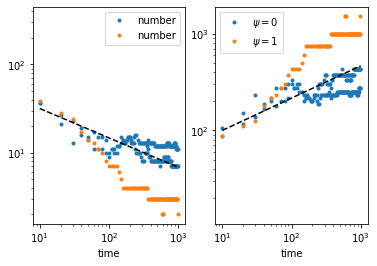

In [186]:
df_rad = pd.DataFrame()
df_rad = df_rad.append(df)
df_rad['rad'] = 100
df_combo = df_hd #.append(df_rad[(df_rad.psi==0) * (df_rad.Wc==1)])

fig,axs = plt.subplots(1,2)
legend = []
for psi,g in df_combo.groupby('psi'):
    g.sort_values('time').plot(x='time', y='number', ax=axs[0], loglog=True, style='.')
    g.sort_values('time').plot(x='time', y='mean_size', ax=axs[1], loglog=True, style='.')
    legend.append('$\psi=%g$'%psi)
axs[1].legend(legend)
axs[0].plot([1e1,1e3], [10**1.5, 10**(1.5-2/3)], 'k--')
axs[1].plot([1e1,1e3], [1e2, 10**(2+2/3)], 'k--')

In [140]:
df[(df.psi==0) * (df.Wc==1)].head()

/Users/timrudge/anaconda2/envs/cellmodeller_py3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,Wc,psi,time,max_size,mean_size,number
8800,1.0,0.0,0.0,4.0,2.084746,936.0
8801,1.0,0.0,10.0,5.0,2.250000,835.0
8802,1.0,0.0,20.0,6.0,2.342857,765.0
8803,1.0,0.0,30.0,7.0,2.447761,709.0
8804,1.0,0.0,40.0,8.0,2.605505,650.0
